# Objectives

# Section 1 - Loading and Preprocess the data

## 1.1: Preprocess each CSV file 

In [38]:
import pandas as pd
from prettypandas import PrettyPandas
import seaborn as sns
import matplotlib.pyplot as plt

### Preprocess Trade Indicators - FAOSTAT_data_en_2-22-2024.csv file

In [39]:
# Load the dataset
df_trade = pd.read_csv('./Food trade indicators - FAOSTAT_data_en_2-22-2024.csv')

# Select the columns and rename them
df_trade = df_trade[['Area', 'Item', 'Year', 'Element', 'Value']]

# Drop rows with any empty values
df_trade = df_trade.dropna()

# only keep rows with 'Item' = 'Fruit and Vegetables'
df_trade = df_trade.loc[df_trade['Item'] == 'Fruit and Vegetables']

#Only keep Item = 'Cereals and Preparations'
# df_trade = df_trade.loc[df_trade['Item'] == 'Cereals and Preparations']

# Pivot the table for 'Import Value' and 'Export Value'
df_import = df_trade[df_trade['Element'] == 'Import Value'].pivot_table(
    index=['Area', 'Item', 'Year'],
    values='Value',
    aggfunc='first'
).rename(columns={'Value': 'Import_Value'}).reset_index()

df_export = df_trade[df_trade['Element'] == 'Export Value'].pivot_table(
    index=['Area', 'Item', 'Year'],
    values='Value',
    aggfunc='first'
).rename(columns={'Value': 'Export_Value'}).reset_index()

# Merge the pivoted DataFrames on 'Area', 'Item', and 'Year'
df_trade_values = pd.merge(df_import, df_export, on=['Area', 'Item', 'Year'], how='inner')

# Create a new column for 'Year' 3 years ahead
df_trade_values['Year_3_Ahead'] = df_trade_values['Year'] + 3

# Merge with itself to get export value 3 years ahead
df_trade_values = pd.merge(df_trade_values, df_trade_values[['Area', 'Item', 'Year', 'Export_Value']],
                           left_on=['Area', 'Item', 'Year_3_Ahead'], right_on=['Area', 'Item', 'Year'],
                           suffixes=('', '_3_Years_Ahead'), how='left')

# Drop unnecessary columns
df_trade_values.drop(['Year_3_Ahead', 'Year_3_Years_Ahead'], axis=1, inplace=True)

# Drop rows with any empty values or value = 0 for Export_Value_3_Years_Ahead
df_trade_values = df_trade_values.dropna().loc[df_trade_values['Export_Value_3_Years_Ahead'] != 0] 

# Display the DataFrame
PrettyPandas(df_trade_values.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Item,Year,Import_Value,Export_Value,Export_Value_3_Years_Ahead
0,Afghanistan,Fruit and Vegetables,1991,360.000000,51858.000000,26907.000000
1,Afghanistan,Fruit and Vegetables,1992,1705.000000,19062.000000,24240.000000
2,Afghanistan,Fruit and Vegetables,1993,2336.000000,21324.000000,39173.000000
3,Afghanistan,Fruit and Vegetables,1994,897.000000,26907.000000,44556.000000
4,Afghanistan,Fruit and Vegetables,1995,906.000000,24240.000000,44243.000000


### Preprocess Pesticides use - FAOSTAT_data_en_2-27-2024.csv file

In [40]:
# Load the pesticides data
df_pesticides = pd.read_csv('./Pesticides use - FAOSTAT_data_en_2-27-2024.csv')

# Select the columns
df_pesticides = df_pesticides[['Area', 'Item', 'Year', 'Element', 'Value']]

# Drop rows with any empty values
df_pesticides = df_pesticides.dropna()

# Pivot the table
df_pesticides_pivot = df_pesticides.pivot_table(
    index=['Area', 'Year'],
    columns=['Item', 'Element'],
    values='Value',
    aggfunc='first'
).reset_index()

# Flatten the MultiIndex in columns and create meaningful column names
df_pesticides_pivot.columns = ['_'.join(col).strip() for col in df_pesticides_pivot.columns.values]
df_pesticides_pivot = df_pesticides_pivot.rename(columns={'Area_': 'Area', 'Year_': 'Year'})

# Add 'Pesticide_' prefix
df_pesticides_pivot = df_pesticides_pivot.rename(columns=lambda x: f'Pesticide_{x}' if x not in ['Area', 'Year'] else x)

# # Fill missing values with 0 assuming no pesticides of that type were used
# df_pesticides_pivot = df_pesticides_pivot.fillna(0)

PrettyPandas(df_pesticides_pivot.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Year,Pesticide_Fungicides and Bactericides_Agricultural Use,Pesticide_Fungicides – Seed treatments_Agricultural Use,Pesticide_Herbicides_Agricultural Use,Pesticide_Insecticides_Agricultural Use,Pesticide_Insecticides – Seed Treatments_Agricultural Use,Pesticide_Pesticides (total)_Agricultural Use,Pesticide_Pesticides (total)_Use per area of cropland,Pesticide_Pesticides (total)_Use per value of agricultural production,Pesticide_Rodenticides_Agricultural Use
0,Albania,2000,105.730000,0.050000,7.990000,169.600000,9.010000,307.980000,0.440000,0.230000,7.540000
1,Albania,2001,108.080000,0.060000,7.990000,174.520000,10.810000,319.380000,0.460000,0.230000,8.250000
2,Albania,2002,110.430000,0.070000,7.980000,179.440000,12.610000,330.780000,0.470000,0.240000,8.960000
3,Albania,2003,112.770000,0.080000,7.980000,184.360000,14.410000,342.170000,0.490000,0.240000,9.670000
4,Albania,2004,115.120000,0.090000,7.980000,189.280000,16.210000,353.570000,0.510000,0.230000,10.370000


### Preprocess Land use - FAOSTAT_data_en_2-22-2024.csv file

In [41]:
# Load the dataset
df_land_use = pd.read_csv('./Land use - FAOSTAT_data_en_2-22-2024.csv', low_memory=False)

# Select the columns
df_land_use = df_land_use[['Area', 'Year', 'Item', 'Value']]

# Drop rows with 'Item' = 'Country are' and 'Land area'
df_land_use = df_land_use.loc[~df_land_use['Item'].isin(['Country area', 'Land area', 'Agricultural land'])]

# Drop rows with any empty values
df_land_use = df_land_use.dropna()

# Pivot the table to have one row per 'Area' and 'Year' and each 'Item' as a column
df_land_use_pivot = df_land_use.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value'
).reset_index()

# Rename the pivoted columns for clarity, appending 'LandUse_' to each
df_land_use_pivot.columns = ['Area', 'Year'] + [f'LandUse_{col}' for col in df_land_use_pivot.columns[2:]]

PrettyPandas(df_land_use_pivot.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Year,LandUse_Agriculture,LandUse_Agriculture area actually irrigated,LandUse_Arable land,LandUse_Cropland,LandUse_Cropland area actually irrigated,LandUse_Farm buildings and Farmyards,LandUse_Forestry area actually irrigated,LandUse_Land area actually irrigated,LandUse_Land area equipped for irrigation,LandUse_Perm. meadows & pastures - Cultivated,LandUse_Perm. meadows & pastures - Nat. growing,LandUse_Perm. meadows & pastures area actually irrig.,LandUse_Permanent crops,LandUse_Permanent meadows and pastures,LandUse_Temporary crops,LandUse_Temporary fallow,LandUse_Temporary meadows and pastures
0,Afghanistan,1980,38049.000000,nan,7910.000000,8049.000000,nan,nan,nan,nan,2505.000000,nan,nan,nan,139.000000,30000.000000,nan,nan,nan
1,Afghanistan,1981,38053.000000,nan,7910.000000,8053.000000,nan,nan,nan,nan,2520.000000,nan,nan,nan,143.000000,30000.000000,nan,nan,nan
2,Afghanistan,1982,38054.000000,nan,7910.000000,8054.000000,nan,nan,nan,nan,2535.000000,nan,nan,nan,144.000000,30000.000000,nan,nan,nan
3,Afghanistan,1983,38054.000000,nan,7910.000000,8054.000000,nan,nan,nan,nan,2550.000000,nan,nan,nan,144.000000,30000.000000,nan,nan,nan
4,Afghanistan,1984,38054.000000,nan,7910.000000,8054.000000,nan,nan,nan,nan,2581.000000,nan,nan,nan,144.000000,30000.000000,nan,nan,nan


### Preprocess Land temperature change - FAOSTAT_data_en_2-27-2024.csv

In [42]:
# Load the dataset
df_temperature = pd.read_csv('./Land temperature change - FAOSTAT_data_en_2-27-2024.csv')

# Filter for 'Temperature change' during the 'Meteorological year'
df_temperature_annual = df_temperature[
    (df_temperature['Element'] == 'Temperature change') &
    (df_temperature['Months'] == 'Meteorological year')
]

# Select relevant columns
df_temperature_annual = df_temperature_annual[['Area', 'Year', 'Value']]

# Rename the 'Value' column to 'TempChange_Annual'
df_temperature_annual.rename(columns={'Value': 'TempChange_Annual'}, inplace=True)

# Fill missing value for Area = 'Rwanda' with value from 'Burundi' for the same year
df_temperature_annual.loc[df_temperature_annual['Area'] == 'Rwanda', 'TempChange_Annual'] = \
    df_temperature_annual.loc[df_temperature_annual['Area'] == 'Uganda', 'TempChange_Annual'].values

PrettyPandas(df_temperature_annual.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Year,TempChange_Annual
184,Afghanistan,2000,0.993000
185,Afghanistan,2001,1.311000
186,Afghanistan,2002,1.365000
187,Afghanistan,2003,0.587000
188,Afghanistan,2004,1.373000


### Preprocess Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv

In [43]:
# Load the dataset
df_fdi = pd.read_csv('./Foreign direct investment - FAOSTAT_data_en_2-27-2024.csv')

# Select relevant columns
df_fdi_relevant = df_fdi[['Area', 'Year', 'Item', 'Value']]

# Use FDI inflows to agriculture only
df_fdi_agri = df_fdi_relevant[df_fdi_relevant['Item'].str.contains('FDI inflows to Agriculture, Forestry and Fishing')]

# Pivot the table
df_fdi_pivot = df_fdi_agri.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value'
).reset_index()

# Rename the columns
df_fdi_pivot.rename(columns=lambda x: f'{x.replace(", ", "_").replace(" ", "_")}' if x not in ['Area', 'Year'] else x, inplace=True)

PrettyPandas(df_fdi_pivot.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


Item,Area,Year,FDI_inflows_to_Agriculture_Forestry_and_Fishing
0,Albania,2004,0.642888
1,Albania,2005,0.494601
2,Albania,2006,2.508966
3,Albania,2007,2.737334
4,Albania,2008,-79.100597


### Preprocess Food security indicators  - FAOSTAT_data_en_2-22-2024.csv

In [44]:
# Load the dataset
df_food_security = pd.read_csv('./Food security indicators  - FAOSTAT_data_en_2-22-2024.csv')

# Filter for relevant 'Item' categories based on the focus of the analysis and create a copy to avoid SettingWithCopyWarning
irrelevant_items = [
    'Prevalence of anemia among women of reproductive age (15-49 years)',
    'Prevalence of low birthweight (percent)',
    'Per capita food production variability (constant 2014-2016 thousand int$ per capita)',
    'Percent of arable land equipped for irrigation (percent) (3-year average)'
]

#drop FSI_Prevalence_of_anemia_among_women_of_reproductive_age_15_49_years and FSI_Prevalence_of_low_birthweight_percent
df_food_security_relevant = df_food_security[~df_food_security['Item'].isin(irrelevant_items)].copy()
    

# Convert 'Year' to a string to handle both single years and ranges (e.g., '2000-2002')
df_food_security_relevant['Year'] = df_food_security_relevant['Year'].astype(str)

# Split into yearly and 3-year average DataFrames
df_yearly = df_food_security_relevant[~df_food_security_relevant['Year'].str.contains('-')]
df_3year_avg = df_food_security_relevant[df_food_security_relevant['Year'].str.contains('-')]

# Expand 3-year averages into annual values
expanded_rows = []
for _, row in df_3year_avg.iterrows():
    start_year, end_year = map(int, row['Year'].split('-'))
    for year in range(start_year, end_year + 1):
        new_row = row.copy()
        new_row['Year'] = str(year)
        expanded_rows.append(new_row)

df_expanded = pd.DataFrame(expanded_rows)

# Merge expanded 3-year data with yearly data, giving precedence to yearly data
df_combined = pd.concat([df_yearly, df_expanded]).drop_duplicates(subset=['Area', 'Year', 'Item'], keep='first')

# Pivot the combined table to get one row per 'Area' and 'Year', with separate columns for each indicator
df_fsi_combined_pivot = df_combined.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value',
    aggfunc='first'
).reset_index()

# Rename the columns for clarity, adding 'FSI_' prefix for Food Security Indicator
df_fsi_combined_pivot.columns = ['Area', 'Year'] + [f'FSI_{c.replace(", ", "_").replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")}' for c in df_fsi_combined_pivot.columns[2:]]

PrettyPandas(df_fsi_combined_pivot.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Year,FSI_Average_dietary_energy_supply_adequacy_percent_3_year_average,FSI_Average_protein_supply_g/cap/day_3_year_average,FSI_Cereal_import_dependency_ratio_percent_3_year_average,FSI_Per_capita_food_supply_variability_kcal/cap/day,FSI_Political_stability_and_absence_of_violence/terrorism_index,FSI_Value_of_food_imports_in_total_merchandise_exports_percent_3_year_average
0,Afghanistan,2000,88.000000,51.400000,34.100000,58.000000,-2.440000,240.000000
1,Afghanistan,2001,88.000000,51.400000,34.100000,47.000000,nan,240.000000
2,Afghanistan,2002,88.000000,51.400000,34.100000,71.000000,-2.040000,240.000000
3,Afghanistan,2003,89.000000,52.100000,29.300000,72.000000,-2.200000,281.000000
4,Afghanistan,2004,92.000000,54.000000,21.100000,50.000000,-2.300000,199.000000


### Preprocess Food balances indicators - FAOSTAT_data_en_2-22-2024.csv

In [45]:
# Load the dataset
df_food_balances = pd.read_csv('./Food balances indicators - FAOSTAT_data_en_2-22-2024.csv')

# Select columns
df_food_balances_relevant = df_food_balances[['Area', 'Year', 'Element', 'Item', 'Value']]

# Only keep Item = 'Fruits - Excluding Wine' and 'Vegetables'
df_food_balances_relevant = df_food_balances_relevant.loc[df_food_balances_relevant['Item'].isin(['Fruits - Excluding Wine', 'Vegetables'])]

# only keep elements 'export quantity'
df_food_balances_relevant = df_food_balances_relevant.loc[df_food_balances_relevant['Element'] == 'Export Quantity']

# Create a new column 'Element_Item' combining 'Element' and 'Item'
df_food_balances_relevant['Element_Item'] = df_food_balances_relevant['Element'] + '_' + df_food_balances_relevant['Item']

# Pivot the table
df_food_balances_pivot = df_food_balances_relevant.pivot_table(
    index=['Area', 'Year'],
    columns='Element_Item',
    values='Value',
    aggfunc='first'
).reset_index()

# Rename the columns
df_food_balances_pivot.rename(columns=lambda x: f'FoodBalance_{x.replace(" ", "_").replace(",", "_").replace("-", "_").replace("/", "_")}' if x not in ['Area', 'Year'] else x, inplace=True)

# # Fill missing values with 0 assuming no food of that type was produced
# df_food_balances_pivot = df_food_balances_pivot.fillna(0)

PrettyPandas(df_food_balances_pivot.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


Element_Item,Area,Year,FoodBalance_Export_Quantity_Fruits___Excluding_Wine,FoodBalance_Export_Quantity_Vegetables
0,Afghanistan,2010,158.000000,149.000000
1,Afghanistan,2011,173.000000,73.000000
2,Afghanistan,2012,142.000000,28.000000
3,Afghanistan,2013,175.000000,37.000000
4,Afghanistan,2014,252.000000,69.000000


### Preprocess Fertilizers use - FAOSTAT_data_en_2-27-2024.csv

In [46]:
# Load the dataset
df_fertilizers = pd.read_csv('./Fertilizers use - FAOSTAT_data_en_2-27-2024.csv')

# Select the columns
df_fertilizers_relevant = df_fertilizers[['Area', 'Year', 'Item', 'Value']]

# Pivot the table
df_fertilizers_pivot = df_fertilizers_relevant.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value',
    aggfunc='first'
).reset_index()

# Rename the columns
df_fertilizers_pivot.rename(columns=lambda x: f'FertilizerUse_{x.replace(" ", "_").replace(",", "_").replace("-", "_").replace("(", "").replace(")", "")}' if x not in ['Area', 'Year'] else x, inplace=True)

# # Fill missing values with 0 assuming no fertilizers of that type were used
# df_fertilizers_pivot = df_fertilizers_pivot.fillna(0)

PrettyPandas(df_fertilizers_pivot.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


Item,Area,Year,FertilizerUse_Ammonia__anhydrous,FertilizerUse_Ammonium_nitrate_AN,FertilizerUse_Ammonium_sulphate,FertilizerUse_Calcium_ammonium_nitrate_CAN_and_other_mixtures_with_calcium_carbonate,FertilizerUse_Diammonium_phosphate_DAP,FertilizerUse_Fertilizers_n.e.c.,FertilizerUse_Monoammonium_phosphate_MAP,FertilizerUse_NPK_fertilizers,FertilizerUse_Other_NK_compounds,FertilizerUse_Other_NP_compounds,FertilizerUse_Other_nitrogenous_fertilizers__n.e.c.,FertilizerUse_Other_phosphatic_fertilizers__n.e.c.,FertilizerUse_Other_potassic_fertilizers__n.e.c.,FertilizerUse_PK_compounds,FertilizerUse_Phosphate_rock,FertilizerUse_Potassium_chloride_muriate_of_potash_MOP,FertilizerUse_Potassium_nitrate,FertilizerUse_Potassium_sulphate_sulphate_of_potash_SOP,FertilizerUse_Sodium_nitrate,FertilizerUse_Superphosphates_above_35%,FertilizerUse_Superphosphates__other,FertilizerUse_Urea,FertilizerUse_Urea_and_ammonium_nitrate_solutions_UAN
0,Afghanistan,2002,nan,nan,nan,nan,nan,nan,nan,17900.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,Afghanistan,2003,nan,nan,nan,nan,nan,nan,nan,33200.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,Afghanistan,2004,nan,nan,nan,nan,nan,nan,nan,47700.000000,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,42300.000000,nan
3,Afghanistan,2005,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,20577.000000,nan
4,Afghanistan,2006,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,68253.000000,nan


### Preprocess Exchange rate - FAOSTAT_data_en_2-22-2024.csv

In [47]:
# Load the dataset
df_exchange_rates = pd.read_csv('./Exchange rate - FAOSTAT_data_en_2-22-2024.csv')

# Group by 'Area' and 'Year' and calculate the mean 'Value'
df_yearly_exchange_rates = df_exchange_rates.groupby(['Area', 'Year'])['Value'].mean().reset_index()

# Rename the column
df_yearly_exchange_rates.rename(columns={'Value': 'Average_Exchange_Rate'}, inplace=True)

PrettyPandas(df_yearly_exchange_rates.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Year,Average_Exchange_Rate
0,Afghanistan,1980,44.129167
1,Afghanistan,1981,49.479902
2,Afghanistan,1982,50.599608
3,Afghanistan,1983,50.599608
4,Afghanistan,1984,50.599606


### Preprocess Emissions - FAOSTAT_data_en_2-27-2024.csv

In [48]:
# Load the dataset
df_emissions = pd.read_csv('./Emissions - FAOSTAT_data_en_2-27-2024.csv')

# Pivot the table
df_emissions_pivot = df_emissions.pivot_table(
    index=['Area', 'Year'],
    columns=['Element', 'Item'],
    values='Value',
    aggfunc='first'
).reset_index()

# Flatten the MultiIndex in columns and join levels with '_'
df_emissions_pivot.columns = ['_'.join(col).strip() for col in df_emissions_pivot.columns.values]

# Rename columns
df_emissions_pivot.columns = ['Area', 'Year'] + [f'Emission_{c.replace(" ", "_").replace("(", "").replace(")", "").replace("-", "_")}' for c in df_emissions_pivot.columns[2:]]

PrettyPandas(df_emissions_pivot.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Area,Year,Emission_Crops_total_Emissions_CH4_All_Crops,Emission_Crops_total_Emissions_N2O_All_Crops,Emission_Emissions_CO2_Cropland_organic_soils,Emission_Emissions_CO2_Grassland_organic_soils,Emission_Emissions_N2O_Cropland_organic_soils,Emission_Emissions_N2O_Grassland_organic_soils
0,Afghanistan,2000,20.847100,0.705600,0.000000,0.000000,0.000000,0.000000
1,Afghanistan,2001,19.260500,0.705400,0.000000,0.000000,0.000000,0.000000
2,Afghanistan,2002,21.255300,1.065600,0.000000,0.000000,0.000000,0.000000
3,Afghanistan,2003,23.701700,1.311700,0.000000,0.000000,0.000000,0.000000
4,Afghanistan,2004,30.308900,1.085600,0.000000,0.000000,0.000000,0.000000


### Preprocess Crops production indicators - FAOSTAT_data_en_2-22-2024.csv

In [49]:
# Load the dataset
df_crops = pd.read_csv('./Crops production indicators - FAOSTAT_data_en_2-22-2024.csv')

# Select the columns
df_crops_filtered = df_crops[['Area', 'Year', 'Element', 'Item', 'Value']]

# Only keep rows with 'Item' = 'Citrus Fruit, Total' and 'Fruit Primary' and 'Vegetables Primary'
df_crops_filtered = df_crops_filtered.loc[df_crops_filtered['Item'].isin(['Citrus Fruit, Total', 'Fruit Primary', 'Vegetables Primary'])]

# Pivot the table
df_crops_pivoted = df_crops_filtered.pivot_table(index=['Area', 'Year'], columns='Item', values='Value').reset_index()

# Rename the columns
df_crops_pivoted = df_crops_pivoted.rename(columns=lambda x: 'CropYield_' + x.replace(', ', '_').replace(' ', '_').replace('(', '').replace(')', '') if x not in ['Area', 'Year'] else x)

# # Fill missing values with 0 assuming no crops of that type were produced
# df_crops_pivoted = df_crops_pivoted.fillna(0)

PrettyPandas(df_crops_pivoted.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


Item,Area,Year,CropYield_Citrus_Fruit_Total,CropYield_Fruit_Primary,CropYield_Vegetables_Primary
0,Afghanistan,2000,71245.000000,76730.000000,124154.000000
1,Afghanistan,2001,71417.000000,80268.000000,124344.000000
2,Afghanistan,2002,71477.000000,80174.000000,123884.000000
3,Afghanistan,2003,73423.000000,82792.000000,124287.000000
4,Afghanistan,2004,78025.000000,79157.000000,132255.000000


### Preprocess Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv

In [50]:
# Load the dataset
df_consumer_prices = pd.read_csv('./Consumer prices indicators - FAOSTAT_data_en_2-22-2024.csv')

# Pivot the table
df_consumer_prices_pivot = df_consumer_prices.pivot_table(
    index=['Area', 'Year'],
    columns='Item',
    values='Value',
    aggfunc='mean'  # Use mean to aggregate monthly data into a single annual value
).reset_index()

# Rename the columns
df_consumer_prices_pivot.rename(columns={
    'Consumer Prices, Food Indices (2015 = 100)': 'ConsumerPrice_Food_Indices',
    'Food price inflation': 'ConsumerPrice_Food_Price_Inflation'
}, inplace=True)

PrettyPandas(df_consumer_prices_pivot.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


Item,Area,Year,ConsumerPrice_Food_Indices,ConsumerPrice_Food_Price_Inflation
0,Afghanistan,2000,26.629848,nan
1,Afghanistan,2001,29.893548,12.780692
2,Afghanistan,2002,35.344892,18.254516
3,Afghanistan,2003,40.203113,14.102244
4,Afghanistan,2004,45.840561,14.072172


### Preprocess Employment - FAOSTAT_data_en_2-27-2024.csv

In [51]:
# Load the dataset
df_employment = pd.read_csv('./Employment - FAOSTAT_data_en_2-27-2024.csv')

# Pivot the table
df_employment_pivot = df_employment.pivot_table(
    index=['Area', 'Year'],
    columns='Indicator',
    values='Value',
    aggfunc='first'  # Assuming there's only one value per area-year-indicator combination
).reset_index()

# Rename columns for clarity and ensure compatibility for merging
df_employment_pivot.rename(columns={
    'Mean weekly hours actually worked per employed person in agriculture, forestry and fishing': 'Employment_Agriculture_Work_Hours_Per_Week',
    'Employment in agriculture, forestry and fishing - ILO modelled estimates': 'Employment_Agriculture_Estimates'
}, inplace=True)

# # Fill missing values with mean of that specific area
# df_employment_pivot = df_employment_pivot.fillna(df_employment_pivot.groupby('Area').transform('mean'))

# # If there are still missing values, fill them with the mean of the entire column since work hours are similar across countries
# df_employment_pivot['Employment_Agriculture_Work_Hours_Per_Week'] = df_employment_pivot['Employment_Agriculture_Work_Hours_Per_Week'].fillna(df_employment_pivot['Employment_Agriculture_Work_Hours_Per_Week'].mean())

PrettyPandas(df_employment_pivot.head())


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


Indicator,Area,Year,Employment_Agriculture_Estimates,Employment_Agriculture_Work_Hours_Per_Week
0,Afghanistan,2000,2765.950000,nan
1,Afghanistan,2001,2805.540000,nan
2,Afghanistan,2002,2897.510000,nan
3,Afghanistan,2003,3093.270000,nan
4,Afghanistan,2004,3212.460000,nan


## 1.2: Perform Merging of DataFrames

In [52]:
# Ensure 'Area' is string type and 'Year' is string type in all DataFrames
df_trade_values['Area'] = df_trade_values['Area'].astype(str)
df_trade_values['Year'] = df_trade_values['Year'].astype(str)

df_pesticides_pivot['Area'] = df_pesticides_pivot['Area'].astype(str)
df_pesticides_pivot['Year'] = df_pesticides_pivot['Year'].astype(str)

df_land_use_pivot['Area'] = df_land_use_pivot['Area'].astype(str)
df_land_use_pivot['Year'] = df_land_use_pivot['Year'].astype(str)

df_temperature_annual['Area'] = df_temperature_annual['Area'].astype(str)
df_temperature_annual['Year'] = df_temperature_annual['Year'].astype(str)

df_fdi_pivot['Area'] = df_fdi_pivot['Area'].astype(str)
df_fdi_pivot['Year'] = df_fdi_pivot['Year'].astype(str)

df_fsi_combined_pivot['Area'] = df_fsi_combined_pivot['Area'].astype(str)
df_fsi_combined_pivot['Year'] = df_fsi_combined_pivot['Year'].astype(str)

df_food_balances_pivot['Area'] = df_food_balances_pivot['Area'].astype(str)
df_food_balances_pivot['Year'] = df_food_balances_pivot['Year'].astype(str)

df_fertilizers_pivot['Area'] = df_fertilizers_pivot['Area'].astype(str)
df_fertilizers_pivot['Year'] = df_fertilizers_pivot['Year'].astype(str)

df_yearly_exchange_rates['Area'] = df_yearly_exchange_rates['Area'].astype(str)
df_yearly_exchange_rates['Year'] = df_yearly_exchange_rates['Year'].astype(str)

df_emissions_pivot['Area'] = df_emissions_pivot['Area'].astype(str)
df_emissions_pivot['Year'] = df_emissions_pivot['Year'].astype(str)

df_crops_pivoted['Area'] = df_crops_pivoted['Area'].astype(str)
df_crops_pivoted['Year'] = df_crops_pivoted['Year'].astype(str)

df_consumer_prices_pivot['Area'] = df_consumer_prices_pivot['Area'].astype(str)
df_consumer_prices_pivot['Year'] = df_consumer_prices_pivot['Year'].astype(str)

df_employment_pivot['Area'] = df_employment_pivot['Area'].astype(str)
df_employment_pivot['Year'] = df_employment_pivot['Year'].astype(str)


# Merge the DataFrames
df_merged = pd.merge(df_trade_values, df_pesticides_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_land_use_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_temperature_annual, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_fdi_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_fsi_combined_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_food_balances_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_fertilizers_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_yearly_exchange_rates, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_emissions_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_crops_pivoted, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_consumer_prices_pivot, on=['Area', 'Year'], how='inner')
df_merged = pd.merge(df_merged, df_employment_pivot, on=['Area', 'Year'], how='inner')

df_merged.head()

,Area,Item,Year,Import_Value,Export_Value,Export_Value_3_Years_Ahead,Pesticide_Fungicides and Bactericides_Agricultural Use,Pesticide_Fungicides – Seed treatments_Agricultural Use,Pesticide_Herbicides_Agricultural Use,Pesticide_Insecticides_Agricultural Use,...,Emission_Emissions_CO2_Grassland_organic_soils,Emission_Emissions_N2O_Cropland_organic_soils,Emission_Emissions_N2O_Grassland_organic_soils,CropYield_Citrus_Fruit_Total,CropYield_Fruit_Primary,CropYield_Vegetables_Primary,ConsumerPrice_Food_Indices,ConsumerPrice_Food_Price_Inflation,Employment_Agriculture_Estimates,Employment_Agriculture_Work_Hours_Per_Week
0,Albania,Fruit and Vegetables,2010,108483.00,11791.00,32438.00,188.53,0.16,6.91,375.80,...,6.8924,0.0726,0.0024,172888.0,201311.0,205666.0,84.268140,5.186276,459.46,36.97
1,Albania,Fruit and Vegetables,2011,96062.00,18571.00,37161.31,208.60,0.17,19.70,317.07,...,6.9296,0.0726,0.0024,208333.0,212906.0,213040.0,87.961900,4.392094,544.53,32.13
2,Albania,Fruit and Vegetables,2013,93658.00,32438.00,69861.95,182.48,0.19,22.33,214.13,...,6.9073,0.0721,0.0024,173730.0,206960.0,223905.0,93.837014,4.214607,455.32,36.13
3,Albania,Fruit and Vegetables,2014,85613.54,37161.31,78308.62,277.58,0.20,27.65,34.48,...,6.9073,0.0721,0.0024,198670.0,211965.0,233766.0,95.911724,2.212385,434.23,31.03
4,Albania,Fruit and Vegetables,2015,79083.51,51950.13,77542.88,236.44,0.21,67.85,148.69,...,6.9036,0.0720,0.0024,222439.0,218487.0,253607.0,100.032060,4.294233,447.56,32.19


## 1.3: Preprocess merged data one more time

In [53]:
from sklearn.impute import KNNImputer

# Check for missing values
missing_values = df_merged.isnull().sum()

missing_values_summary = missing_values[missing_values > 0]

# Dropping columns with a high percentage of missing values (50%)
high_missing_cols = missing_values_summary.index[missing_values_summary > (0.5 * len(df_merged))]
df_merged = df_merged.drop(columns=high_missing_cols)

# Check for missing values
missing_values = df_merged.isnull().sum()

missing_values_summary = missing_values[missing_values > 0]

print(missing_values_summary)


Pesticide_Rodenticides_Agricultural Use                                                  56
LandUse_Land area equipped for irrigation                                                 8
LandUse_Permanent crops                                                                  10
LandUse_Permanent meadows and pastures                                                    7
FertilizerUse_Ammonium_nitrate_AN                                                       141
FertilizerUse_Ammonium_sulphate                                                          58
FertilizerUse_Calcium_ammonium_nitrate_CAN_and_other_mixtures_with_calcium_carbonate    170
FertilizerUse_Diammonium_phosphate_DAP                                                  108
FertilizerUse_Monoammonium_phosphate_MAP                                                169
FertilizerUse_NPK_fertilizers                                                            84
FertilizerUse_Other_NP_compounds                                                

In [54]:
# # Fill the missing values using mean imputation on numerical columns
# for col in df_merged.select_dtypes(include=['float64', 'number']).columns:
#     df_merged[col] = df_merged[col].fillna(df_merged[col].mean())

# Fill the missing values using KNNImputer
imputer = KNNImputer()

for i in df_merged.select_dtypes(include=['float64', 'number']).columns:
    df_merged[i] = imputer.fit_transform(df_merged[[i]])

In [55]:
# Dropping duplicate rows
df_merged = df_merged.drop_duplicates()

In [56]:
# Dropping the columns 'Area' since the model will be generalized to predict for any country
df_merged = df_merged.drop(columns=['Area'])

In [57]:
# Encoding columns
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# One-hot encode 'Item' column
onehot_encoder = OneHotEncoder()
item_encoded_sparse = onehot_encoder.fit_transform(df_merged['Item'].values.reshape(-1, 1))

# Convert the sparse matrix to a dense array
item_encoded = item_encoded_sparse.toarray()

# Create a DataFrame from the encoded array
df_item_encoded = pd.DataFrame(item_encoded, columns=onehot_encoder.get_feature_names_out(['Item']))

# Concatenate the encoded DataFrame with the original DataFrame
df_merged = pd.concat([df_merged, df_item_encoded], axis=1)

# Drop the original 'Item' column
df_merged = df_merged.drop(columns=['Item'])


In [58]:
# sort by year
df_merged = df_merged.sort_values(by=['Year'])

#convert year to int
df_merged['Year'] = df_merged['Year'].astype(int)

In [59]:
#reset index
df_merged = df_merged.reset_index(drop=True)

# Save the cleaned and preprocessed data to a CSV file
df_merged.to_csv('merged_data.csv', index=False)

# Display the DataFrame
PrettyPandas(df_merged.describe())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Year,Import_Value,Export_Value,Export_Value_3_Years_Ahead,Pesticide_Fungicides and Bactericides_Agricultural Use,Pesticide_Herbicides_Agricultural Use,Pesticide_Insecticides_Agricultural Use,Pesticide_Pesticides (total)_Agricultural Use,Pesticide_Pesticides (total)_Use per area of cropland,Pesticide_Pesticides (total)_Use per value of agricultural production,Pesticide_Rodenticides_Agricultural Use,LandUse_Agriculture,LandUse_Arable land,LandUse_Cropland,LandUse_Land area equipped for irrigation,LandUse_Permanent crops,LandUse_Permanent meadows and pastures,LandUse_Temporary crops,LandUse_Temporary fallow,LandUse_Temporary meadows and pastures,TempChange_Annual,FDI_inflows_to_Agriculture_Forestry_and_Fishing,FSI_Average_dietary_energy_supply_adequacy_percent_3_year_average,FSI_Average_protein_supply_g/cap/day_3_year_average,FSI_Cereal_import_dependency_ratio_percent_3_year_average,FSI_Per_capita_food_supply_variability_kcal/cap/day,FSI_Political_stability_and_absence_of_violence/terrorism_index,FSI_Value_of_food_imports_in_total_merchandise_exports_percent_3_year_average,FoodBalance_Export_Quantity_Fruits___Excluding_Wine,FoodBalance_Export_Quantity_Vegetables,FertilizerUse_Ammonium_nitrate_AN,FertilizerUse_Ammonium_sulphate,FertilizerUse_Calcium_ammonium_nitrate_CAN_and_other_mixtures_with_calcium_carbonate,FertilizerUse_Diammonium_phosphate_DAP,FertilizerUse_Monoammonium_phosphate_MAP,FertilizerUse_NPK_fertilizers,FertilizerUse_Other_NP_compounds,FertilizerUse_PK_compounds,FertilizerUse_Potassium_chloride_muriate_of_potash_MOP,FertilizerUse_Potassium_sulphate_sulphate_of_potash_SOP,FertilizerUse_Superphosphates_above_35%,FertilizerUse_Superphosphates__other,FertilizerUse_Urea,Average_Exchange_Rate,Emission_Crops_total_Emissions_CH4_All_Crops,Emission_Crops_total_Emissions_N2O_All_Crops,Emission_Emissions_CO2_Cropland_organic_soils,Emission_Emissions_CO2_Grassland_organic_soils,Emission_Emissions_N2O_Cropland_organic_soils,Emission_Emissions_N2O_Grassland_organic_soils,CropYield_Citrus_Fruit_Total,CropYield_Fruit_Primary,CropYield_Vegetables_Primary,ConsumerPrice_Food_Indices,ConsumerPrice_Food_Price_Inflation,Employment_Agriculture_Estimates,Employment_Agriculture_Work_Hours_Per_Week,Item_Fruit and Vegetables
count,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000,419.000000
mean,2013.921241,2130879.687613,2315717.060740,2617335.135632,7178.186420,18675.873986,9372.746253,38151.778998,3.571814,1.103962,293.428705,39348.601571,13870.977704,15663.695905,3774.289220,1836.543982,23681.676305,11110.017224,1784.473283,976.480300,1.199766,114.409404,125.599045,85.669451,-3.916468,39.384248,0.020286,13.763723,1267.174224,776.813842,236492.096403,227313.005706,153610.752651,473945.185627,212041.630400,534945.769433,333564.986795,50915.878655,419446.285438,19974.160525,131310.302911,493788.441286,1530205.728695,767.314489,298.011129,7.922474,7885.427258,1402.367972,2.024260,0.539715,158511.506579,128189.951100,220363.615752,94.235126,5.965592,8674.822315,38.048621,1.000000
std,2.973729,5341488.876494,4601240.664887,5089624.131538,11816.032475,53705.973748,28052.614668,88846.882317,3.984149,0.997224,1438.933524,84881.768276,33457.274112,35466.593597,11240.105698,4145.450492,59843.099965,28213.561999,4453.061929,2102.813320,0.585548,450.845820,12.907718,19.909695,87.793547,24.213718,0.852148,13.523647,2174.821718,1691.708939,436807.518428,519065.026842,209257.173882,1425

# Section 2: Selecting training, validation, and test sets

In [60]:
from sklearn.model_selection import train_test_split

# Identify one-hot encoded item columns
item_columns = [col for col in df_merged.columns if col.startswith('Item_')]

# Initialize lists to store dataframes
train_dfs = []
val_dfs = []
test_dfs = []

# Loop through each item column
for item_col in item_columns:
    # Select rows where the item indicator is 1 (indicating the presence of the item)
    item_data = df_merged[df_merged[item_col] == 1].sort_values(by='Year')
    
    # Split the data into training and test sets using random sampling
    train_test, test = train_test_split(item_data, test_size=0.2, random_state=42)
    
    # Further split the training and test sets into training and validation sets
    train, val = train_test_split(train_test, test_size=0.2, random_state=42)
    
    # Append the dataframes to the respective lists
    train_dfs.append(train)
    val_dfs.append(val)
    test_dfs.append(test)

# Concatenate all training, validation, and test dataframes
train_df = pd.concat(train_dfs)
val_df = pd.concat(val_dfs)
test_df = pd.concat(test_dfs)

# Drop the 'Year' column
train_df = train_df.drop(columns=['Year'])
val_df = val_df.drop(columns=['Year'])
test_df = test_df.drop(columns=['Year'])

# Check the percentage of data in each set
train_percent = len(train_df) / len(df_merged)
val_percent = len(val_df) / len(df_merged)
test_percent = len(test_df) / len(df_merged)

# Print the number of samples and percentage in each set
print(f'Training set: {len(train_df)} samples ({train_percent:.2%})')
print(f'Validation set: {len(val_df)} samples ({val_percent:.2%})')
print(f'Test set: {len(test_df)} samples ({test_percent:.2%})')

# Display the head of the training set
PrettyPandas(train_df.head())


Training set: 268 samples (63.96%)
Validation set: 67 samples (15.99%)
Test set: 84 samples (20.05%)


/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:211: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[row_ix] = df.loc[row_ix].fillna('')
/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Import_Value,Export_Value,Export_Value_3_Years_Ahead,Pesticide_Fungicides and Bactericides_Agricultural Use,Pesticide_Herbicides_Agricultural Use,Pesticide_Insecticides_Agricultural Use,Pesticide_Pesticides (total)_Agricultural Use,Pesticide_Pesticides (total)_Use per area of cropland,Pesticide_Pesticides (total)_Use per value of agricultural production,Pesticide_Rodenticides_Agricultural Use,LandUse_Agriculture,LandUse_Arable land,LandUse_Cropland,LandUse_Land area equipped for irrigation,LandUse_Permanent crops,LandUse_Permanent meadows and pastures,LandUse_Temporary crops,LandUse_Temporary fallow,LandUse_Temporary meadows and pastures,TempChange_Annual,FDI_inflows_to_Agriculture_Forestry_and_Fishing,FSI_Average_dietary_energy_supply_adequacy_percent_3_year_average,FSI_Average_protein_supply_g/cap/day_3_year_average,FSI_Cereal_import_dependency_ratio_percent_3_year_average,FSI_Per_capita_food_supply_variability_kcal/cap/day,FSI_Political_stability_and_absence_of_violence/terrorism_index,FSI_Value_of_food_imports_in_total_merchandise_exports_percent_3_year_average,FoodBalance_Export_Quantity_Fruits___Excluding_Wine,FoodBalance_Export_Quantity_Vegetables,FertilizerUse_Ammonium_nitrate_AN,FertilizerUse_Ammonium_sulphate,FertilizerUse_Calcium_ammonium_nitrate_CAN_and_other_mixtures_with_calcium_carbonate,FertilizerUse_Diammonium_phosphate_DAP,FertilizerUse_Monoammonium_phosphate_MAP,FertilizerUse_NPK_fertilizers,FertilizerUse_Other_NP_compounds,FertilizerUse_PK_compounds,FertilizerUse_Potassium_chloride_muriate_of_potash_MOP,FertilizerUse_Potassium_sulphate_sulphate_of_potash_SOP,FertilizerUse_Superphosphates_above_35%,FertilizerUse_Superphosphates__other,FertilizerUse_Urea,Average_Exchange_Rate,Emission_Crops_total_Emissions_CH4_All_Crops,Emission_Crops_total_Emissions_N2O_All_Crops,Emission_Emissions_CO2_Cropland_organic_soils,Emission_Emissions_CO2_Grassland_organic_soils,Emission_Emissions_N2O_Cropland_organic_soils,Emission_Emissions_N2O_Grassland_organic_soils,CropYield_Citrus_Fruit_Total,CropYield_Fruit_Primary,CropYield_Vegetables_Primary,ConsumerPrice_Food_Indices,ConsumerPrice_Food_Price_Inflation,Employment_Agriculture_Estimates,Employment_Agriculture_Work_Hours_Per_Week,Item_Fruit and Vegetables
118,491516.000000,942866.000000,990552.470000,17717.000000,23882.000000,12198.000000,53797.000000,15.780000,2.810000,0.000000,41721.000000,1586.000000,3409.000000,1087.000000,1823.000000,38312.000000,1493.000000,93.000000,0.000000,0.467000,144.082894,120.000000,61.300000,61.000000,54.000000,-1.280000,8.000000,1977.000000,8.000000,138705.000000,42282.000000,153610.752651,180978.000000,159797.000000,813976.000000,34150.000000,877.000000,599763.000000,18340.000000,278.000000,493788.441286,810858.000000,1848.016667,108.254300,0.998900,428.981700,213.462300,0.065700,0.047600,147775.000000,119925.000000,214574.000000,86.084984,4.576680,3648.680000,41.070000,1.000000
247,121762.490000,226570.250000,152979.490000,825.120000,341.670000,138.570000,1350.980000,2.830000,1.150000,20.790000,2418.100000,367.700000,477.700000,469.000000,110.000000,1940.400000,263.700000,96.900000,7.100000,1.780000,18.591348,126.000000,78.700000,61.000000,27.000000,-0.470000,37.000000,59.000000,7.000000,236492.096403,227313.005706,153610.752651,473945.185627,212041.630400,534945.769433,333564.986795,50915.878655,419446.285438,19974.160525,131310.302911,493788.441286,1530205.728695,2.269342,0.343900,0.102700,0.000000,0.000000,0.000000,0.000000,35489.000000,42114.000000,80618.000000,100.010022,4.190244,769.010000,38.048621,1.000000
328,168143.230000,101710.300000,80100.440000,1226.680000,12604.770000,709.790000,14905.960000,6.710000,2.280000,0.830000,14222.900000,2183.900000,2222.900000,262.500000,39.000000,12000.000000,1446.900000,197.000000,540.000000,1.546000,-88.928363,131.000000,83.700000,-105.100000,47.000000,1.050000,12.000000,110.000000,3.000000,1646.000000,42148.000000,17.000000,89821.000000,88868.000000,12946.000000,29017.000000,664.000000,67656.0000

In [61]:
import numpy as np

# Apply log transformation to the 'Export_Value_3_Years_Ahead' to reduce skewness
# Adding a small constant to avoid issues with log(0)
train_df['Export_Value_3_Years_Ahead'] = np.log1p(train_df['Export_Value_3_Years_Ahead'])
val_df['Export_Value_3_Years_Ahead'] = np.log1p(val_df['Export_Value_3_Years_Ahead'])
test_df['Export_Value_3_Years_Ahead'] = np.log1p(test_df['Export_Value_3_Years_Ahead'])

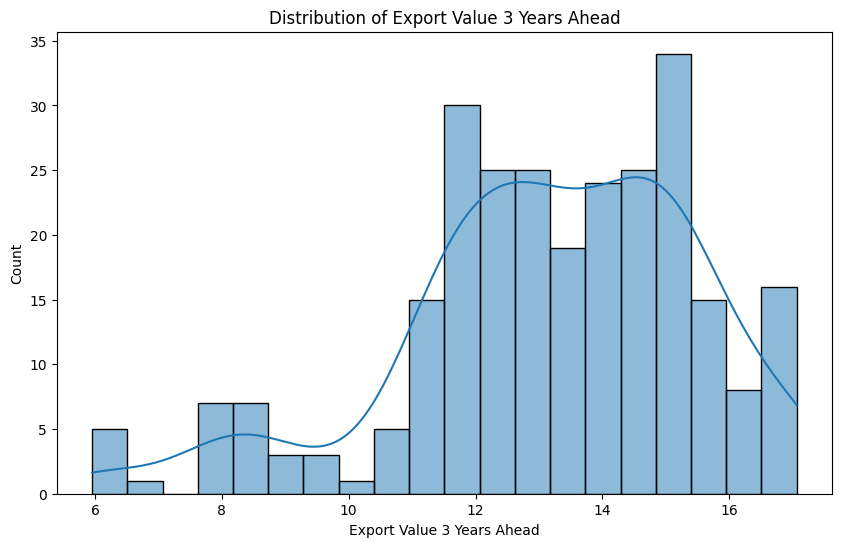

In [62]:
# Visualize the distribution of the target variable 'Export_Value_3_Years_Ahead'
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Export_Value_3_Years_Ahead', bins=20, kde=True)
plt.title('Distribution of Export Value 3 Years Ahead')
plt.xlabel('Export Value 3 Years Ahead')
plt.ylabel('Count')
plt.show()

# Section 3: Scaling/normalization

In [63]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Select features to scale (exclude the target variable 'Export_Value_3_Years_Ahead')
features_to_scale = train_df.drop(columns=['Export_Value_3_Years_Ahead']).columns

# Fit the scaler on the training data (excluding the target variable)
scaler.fit(train_df[features_to_scale])

# Apply the scaling transformation to the features of the training, validation, and test datasets
scaled_train_data = scaler.transform(train_df[features_to_scale])
scaled_val_data = scaler.transform(val_df[features_to_scale])
scaled_test_data = scaler.transform(test_df[features_to_scale])

# If you want to keep the target variable in the same DataFrame, you can reassign the scaled values to the original DataFrame
train_df[features_to_scale] = scaled_train_data
val_df[features_to_scale] = scaled_val_data
test_df[features_to_scale] = scaled_test_data

# Display the DataFrame
PrettyPandas(train_df.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Import_Value,Export_Value,Export_Value_3_Years_Ahead,Pesticide_Fungicides and Bactericides_Agricultural Use,Pesticide_Herbicides_Agricultural Use,Pesticide_Insecticides_Agricultural Use,Pesticide_Pesticides (total)_Agricultural Use,Pesticide_Pesticides (total)_Use per area of cropland,Pesticide_Pesticides (total)_Use per value of agricultural production,Pesticide_Rodenticides_Agricultural Use,LandUse_Agriculture,LandUse_Arable land,LandUse_Cropland,LandUse_Land area equipped for irrigation,LandUse_Permanent crops,LandUse_Permanent meadows and pastures,LandUse_Temporary crops,LandUse_Temporary fallow,LandUse_Temporary meadows and pastures,TempChange_Annual,FDI_inflows_to_Agriculture_Forestry_and_Fishing,FSI_Average_dietary_energy_supply_adequacy_percent_3_year_average,FSI_Average_protein_supply_g/cap/day_3_year_average,FSI_Cereal_import_dependency_ratio_percent_3_year_average,FSI_Per_capita_food_supply_variability_kcal/cap/day,FSI_Political_stability_and_absence_of_violence/terrorism_index,FSI_Value_of_food_imports_in_total_merchandise_exports_percent_3_year_average,FoodBalance_Export_Quantity_Fruits___Excluding_Wine,FoodBalance_Export_Quantity_Vegetables,FertilizerUse_Ammonium_nitrate_AN,FertilizerUse_Ammonium_sulphate,FertilizerUse_Calcium_ammonium_nitrate_CAN_and_other_mixtures_with_calcium_carbonate,FertilizerUse_Diammonium_phosphate_DAP,FertilizerUse_Monoammonium_phosphate_MAP,FertilizerUse_NPK_fertilizers,FertilizerUse_Other_NP_compounds,FertilizerUse_PK_compounds,FertilizerUse_Potassium_chloride_muriate_of_potash_MOP,FertilizerUse_Potassium_sulphate_sulphate_of_potash_SOP,FertilizerUse_Superphosphates_above_35%,FertilizerUse_Superphosphates__other,FertilizerUse_Urea,Average_Exchange_Rate,Emission_Crops_total_Emissions_CH4_All_Crops,Emission_Crops_total_Emissions_N2O_All_Crops,Emission_Emissions_CO2_Cropland_organic_soils,Emission_Emissions_CO2_Grassland_organic_soils,Emission_Emissions_N2O_Cropland_organic_soils,Emission_Emissions_N2O_Grassland_organic_soils,CropYield_Citrus_Fruit_Total,CropYield_Fruit_Primary,CropYield_Vegetables_Primary,ConsumerPrice_Food_Indices,ConsumerPrice_Food_Price_Inflation,Employment_Agriculture_Estimates,Employment_Agriculture_Work_Hours_Per_Week,Item_Fruit and Vegetables
118,-0.321809,-0.325243,13.806019,0.862323,0.038193,0.091689,0.122937,2.759093,1.705018,-0.202502,0.001344,-0.380370,-0.361101,-0.255180,-0.021203,0.245021,-0.356208,-0.384361,-0.471885,-1.310897,0.114354,-0.475876,-1.236381,0.693546,0.588344,-1.562190,-0.418079,0.234593,-0.471712,-0.233580,-0.356165,0.025917,-0.223752,-0.136166,0.175078,-0.394696,-0.599651,0.098930,-0.062240,-0.457786,-0.040217,-0.167300,0.542388,-0.218441,-0.358010,-0.218704,-0.353951,-0.335709,-0.357631,-0.142877,-0.213290,-0.089423,-0.433514,-0.104003,-0.168180,0.556370,0.000000
247,-0.382505,-0.467819,11.938066,-0.550498,-0.355923,-0.344139,-0.424859,-0.245117,0.049204,-0.187298,-0.453150,-0.413326,-0.436207,-0.304865,-0.440348,-0.385171,-0.395630,-0.383550,-0.468853,0.986630,-0.225676,-0.000591,-0.368163,0.693546,-0.538809,-0.609819,1.901198,-0.573220,-0.472271,-0.006957,-0.007355,0.025917,-0.042384,-0.039259,-0.048330,-0.053966,-0.062654,-0.042261,-0.028772,-0.004543,-0.040217,-0.030579,-0.269402,-0.339627,-0.398800,-0.231935,-0.409198,-0.346955,-0.386323,-1.524093,-1.432448,-0.786824,0.318993,-0.130523,-0.251250,0.003159,0.000000
328,-0.374892,-0.492672,11.291049,-0.516912,-0.150612,-0.323495,-0.283278,0.654986,1.176354,-0.201895,-0.316641,-0.364197,-0.391492,-0.321467,-0.457720,-0.210873,-0.357686,-0.362741,-0.241278,0.577170,-0.517009,0.395480,-0.118674,-1.238386,0.296119,1.177346,-0.098178,-0.551740,-0.474507,-0.551217,-0.356418,-0.712430,-0.280184,-0.267729,-0.466275,-0.400537,-0.601937,-0.317719,-0.426928,-0.184624,-0.533626,-0.282063,-0.257788,-0.287552,-0.333291,-0.229883,-0.377641,-0.338927,-0.360765,0.284984,0.486137,-0.140334,1.006896,-0.223028,-0.269395,0.003159,0.000000
244,-0.220595,1.010830,15.760913,0.717376,-0.230636,0.001158,-0.03134

# Section 3: Feature selection

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Define features and target
X_train = train_df.drop(columns=['Export_Value_3_Years_Ahead'])
y_train = train_df['Export_Value_3_Years_Ahead']

from sklearn.ensemble import RandomForestRegressor

# Initialize the base estimator with fewer trees
base_estimator = RandomForestRegressor(n_estimators=50, random_state=42)

# Decrease the number of features to select
n_features_to_select = 12

# Increase the step size
step = 2

# Initialize RFE with the adjusted parameters
rfe = RFE(estimator=base_estimator, n_features_to_select=n_features_to_select, step=step)

# Fit RFE
rfe.fit(X_train, y_train)

# Get the mask of the selected features
selected_features = X_train.columns[rfe.support_]

# Add the target variable to the selected features
selected_features = np.append(selected_features, 'Export_Value_3_Years_Ahead')

print(f"Selected Features: {selected_features.tolist()}")


Selected Features: ['Import_Value', 'Export_Value', 'LandUse_Land area equipped for irrigation', 'FSI_Value_of_food_imports_in_total_merchandise_exports_percent_3_year_average', 'FoodBalance_Export_Quantity_Fruits___Excluding_Wine', 'FoodBalance_Export_Quantity_Vegetables', 'FertilizerUse_Ammonium_sulphate', 'FertilizerUse_Urea', 'Emission_Emissions_CO2_Cropland_organic_soils', 'CropYield_Citrus_Fruit_Total', 'CropYield_Fruit_Primary', 'CropYield_Vegetables_Primary', 'Export_Value_3_Years_Ahead']


In [65]:
# Make changes to the training, validation, and test sets to use only 

# Update the training, validation, and test sets to include only the selected features
train_df = train_df[selected_features]
val_df = val_df[selected_features]
test_df = test_df[selected_features]

# Verify the changes
PrettyPandas(train_df.head())

/Users/pbson/Library/Python/3.9/lib/python/site-packages/prettypandas/summarizer.py:215: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  self


,Import_Value,Export_Value,LandUse_Land area equipped for irrigation,FSI_Value_of_food_imports_in_total_merchandise_exports_percent_3_year_average,FoodBalance_Export_Quantity_Fruits___Excluding_Wine,FoodBalance_Export_Quantity_Vegetables,FertilizerUse_Ammonium_sulphate,FertilizerUse_Urea,Emission_Emissions_CO2_Cropland_organic_soils,CropYield_Citrus_Fruit_Total,CropYield_Fruit_Primary,CropYield_Vegetables_Primary,Export_Value_3_Years_Ahead
118,-0.321809,-0.325243,-0.255180,-0.418079,0.234593,-0.471712,-0.356165,-0.167300,-0.218704,-0.142877,-0.213290,-0.089423,13.806019
247,-0.382505,-0.467819,-0.304865,1.901198,-0.573220,-0.472271,-0.007355,-0.030579,-0.231935,-1.524093,-1.432448,-0.786824,11.938066
328,-0.374892,-0.492672,-0.321467,-0.098178,-0.551740,-0.474507,-0.356418,-0.282063,-0.229883,0.284984,0.486137,-0.140334,11.291049
244,-0.220595,1.010830,0.076696,-0.578029,1.174233,0.540891,0.475187,-0.111327,-0.231924,1.718995,0.191889,0.585346,15.760913
404,-0.379238,-0.512819,-0.342567,-0.258128,-0.598070,-0.476183,-0.435673,-0.320914,-0.231935,-0.010809,-0.083794,3.760705,7.738871


# Section 4: Building and evaluating a multilayer perceptron (MLP)

In [66]:
import tensorflow as tf
from tensorflow.keras import layers, models, backend as K

# Custom loss function to calculate the percentage difference
def percentage_difference_loss(y_true, y_pred):
    # Calculate the absolute difference
    abs_diff = K.abs(y_true - y_pred)
    
    # Avoid division by zero and calculate the percentage difference
    epsilon = K.epsilon()  # Small constant to avoid division by zero
    percentage_diff = (abs_diff / (K.abs(y_true) + epsilon)) * 100
    
    # Return the mean percentage difference
    return K.mean(percentage_diff, axis=-1)

# Define the model with L2 regularization
model = models.Sequential([
    layers.Dense(150, activation='relu', input_shape=(train_df.shape[1]-1,), 
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(100, activation='relu',
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(50, activation='relu', 
                 kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(1)
])

# Compile the model with the custom loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss=percentage_difference_loss,
              metrics=['mean_absolute_error'])

# Train the model with early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=100, restore_best_weights=True)

history = model.fit(train_df.drop(columns=['Export_Value_3_Years_Ahead']),
                    train_df['Export_Value_3_Years_Ahead'],
                    epochs=1000,
                    batch_size=32,
                    validation_data=(val_df.drop(columns=['Export_Value_3_Years_Ahead']), val_df['Export_Value_3_Years_Ahead']),
                    callbacks=[early_stopping],
                    verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(test_df.drop(columns=['Export_Value_3_Years_Ahead']), test_df['Export_Value_3_Years_Ahead'], verbose=0)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')


Epoch 1/1000


/Users/pbson/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 102.9068 - mean_absolute_error: 13.2201 - val_loss: 102.3342 - val_mean_absolute_error: 13.3787
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.9830 - mean_absolute_error: 13.0304 - val_loss: 101.7045 - val_mean_absolute_error: 13.2958
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 101.3021 - mean_absolute_error: 13.1021 - val_loss: 101.1008 - val_mean_absolute_error: 13.2165
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 100.5293 - mean_absolute_error: 12.9629 - val_loss: 100.4928 - val_mean_absolute_error: 13.1364
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.7892 - mean_absolute_error: 12.8141 - val_loss: 99.8505 - val_mean_absolute_error: 13.0521
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 99.1650 - mean_absolute_error: 12.7908 - val_loss: 99.1694 - val_mean_absolute_error: 12.9629
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 98.5493 - mean_absolute_error: 12.

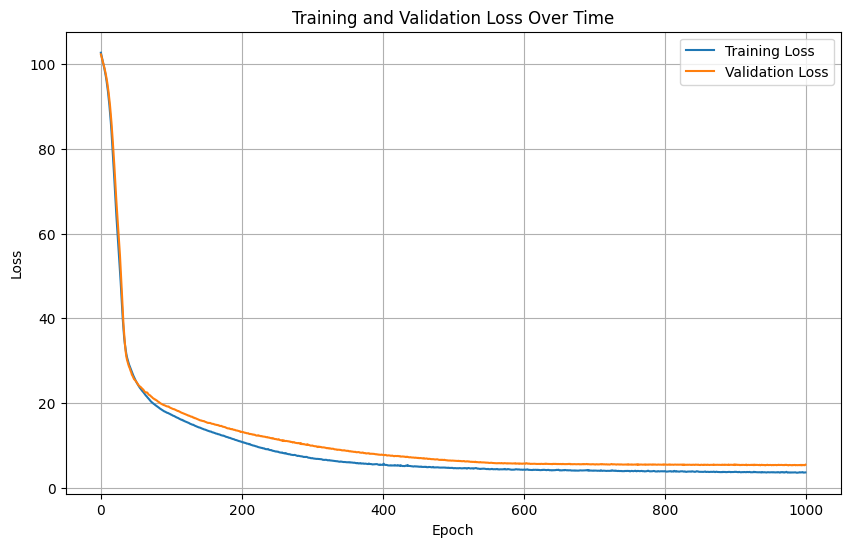

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [67]:
# Plot the training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Predictions
predictions = model.predict(test_df.drop(columns=['Export_Value_3_Years_Ahead']))

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming 'test_df' is your test dataset and 'model' is your trained model
# Ensure 'test_df' does not include the target variable column in the features
X_test = test_df.drop(columns=['Export_Value_3_Years_Ahead'])
y_test = test_df['Export_Value_3_Years_Ahead']  # The actual target values

# Make predictions
predictions = model.predict(X_test).flatten()  # Flatten to ensure the predictions array shape matches the target array

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step
Mean Absolute Error (MAE): 0.6228048421282941
Mean Squared Error (MSE): 0.882465518803411
Root Mean Squared Error (RMSE): 0.9393963587343794
R-squared (R²): 0.8086314914613728


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


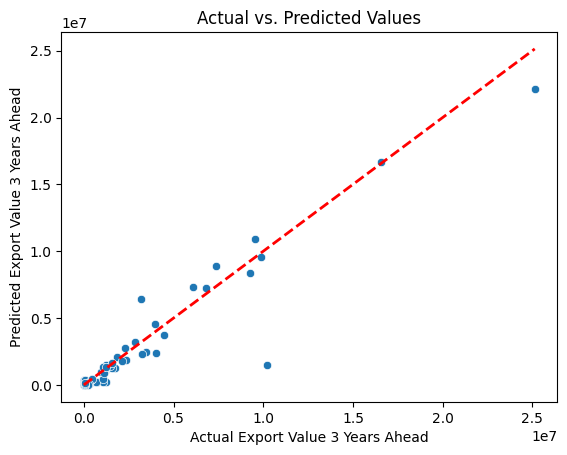

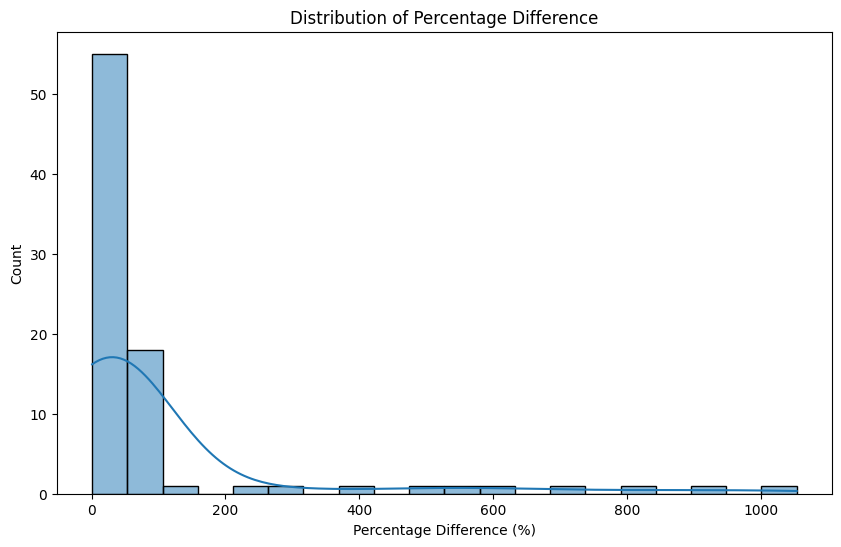

Test Accuracy: -1.0384464900306796%


In [71]:
import pandas as pd
import numpy as np

# Generate predictions on the test set
log_predictions = model.predict(test_df.drop(columns=['Export_Value_3_Years_Ahead'])).flatten()

# Inverse transform predictions and true labels from log scale to original scale
predictions_original_scale = np.expm1(log_predictions)
true_labels_original_scale = np.expm1(test_df['Export_Value_3_Years_Ahead'])

# Calculate and cap the absolute percentage difference
percentage_difference = (abs(predictions_original_scale - true_labels_original_scale) / true_labels_original_scale) * 100

# Create results DataFrame
results_df = pd.DataFrame({
    'True_Label': true_labels_original_scale,
    'Prediction': predictions_original_scale,
    'Percentage_Difference': percentage_difference
})

# Save the results to a CSV file
results_df.to_csv('results.csv', index=False)

# Display the results DataFrame
PrettyPandas(results_df.head())

# Plot the actual vs. predicted values
sns.scatterplot(x='True_Label', y='Prediction', data=results_df)
plt.plot([results_df['True_Label'].min(), results_df['True_Label'].max()], [results_df['True_Label'].min(), results_df['True_Label'].max()], 'r--', lw=2)  # Diagonal line for reference
plt.xlabel('Actual Export Value 3 Years Ahead')
plt.ylabel('Predicted Export Value 3 Years Ahead')
plt.title('Actual vs. Predicted Values')
plt.show()

# Plot the distribution of the percentage difference
plt.figure(figsize=(10, 6))
sns.histplot(percentage_difference, bins=20, kde=True)
plt.title('Distribution of Percentage Difference')
plt.xlabel('Percentage Difference (%)')
plt.ylabel('Count')
plt.show()